### Nama : Muhammad Priambodo Satrio Wibowo

### Email : satriow110702@gmail.com

sumber: https://www.kaggle.com/datasets/lazrus/headlines-5000

In [121]:

import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dropout, Dense

sns.set()
%matplotlib inline

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/saatriow/Model_NLP_TF/main/Headlines_5000.csv')

In [123]:
df.head

<bound method NDFrame.head of               date time_12hr time_24hr  \
0     FEB 26, 2022  12:13 AM     00:13   
1     FEB 25, 2022  10:25 PM     22:25   
2     FEB 25, 2022   9:47 PM     21:47   
3     FEB 25, 2022   9:41 PM     21:41   
4     FEB 25, 2022   9:23 PM     21:23   
...            ...       ...       ...   
4994  SEP 23, 2021   4:58 PM     16:58   
4995  SEP 23, 2021   3:54 PM     15:54   
4996  SEP 23, 2021   3:19 PM     15:19   
4997  SEP 23, 2021   3:12 PM     15:12   
4998  SEP 23, 2021   2:54 PM     14:54   

                                               headline category  
0     Russia-Ukraine war LIVE updates: NATO leaders ...    WORLD  
1     CNBC-TV18 Classroom: What should be your optio...   MARKET  
2     Ukraine-Russia conflict: From sunflower oil to...   MARKET  
3     IOC to be dropped from Nifty 50 from March 31;...   MARKET  
4     CBI says NSE Himalayan yogi none other than An...   MARKET  
...                                                 ...      ..

In [124]:

df.shape

(4999, 5)

In [125]:

df.isnull().values.any()

False

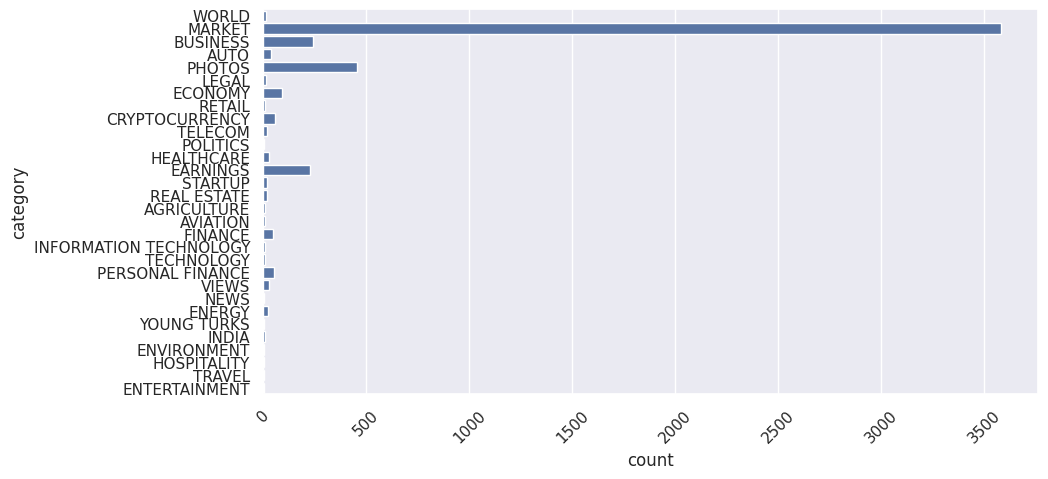

In [126]:

plt.figure(figsize=(10,5))
sns.countplot(df['category'])
plt.xticks(rotation=45)
plt.show()

In [127]:
review = pd.get_dummies(df['category'])
df2 = pd.concat([df, review], axis=1)
df2 = df2.drop('category', axis=1)
df2.head()

,date,time_12hr,time_24hr,headline,AGRICULTURE,AUTO,AVIATION,BUSINESS,CRYPTOCURRENCY,EARNINGS,...,POLITICS,REAL ESTATE,RETAIL,STARTUP,TECHNOLOGY,TELECOM,TRAVEL,VIEWS,WORLD,YOUNG TURKS
0,"FEB 26, 2022",12:13 AM,00:13,Russia-Ukraine war LIVE updates: NATO leaders ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,"FEB 25, 2022",10:25 PM,22:25,CNBC-TV18 Classroom: What should be your optio...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"FEB 25, 2022",9:47 PM,21:47,Ukraine-Russia conflict: From sunflower oil to...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"FEB 25, 2022",9:41 PM,21:41,IOC to be dropped from Nifty 50 from March 31;...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"FEB 25, 2022",9:23 PM,21:23,CBI says NSE Himalayan yogi none other than An...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
hl = df2['headline'].values
cat = df2[['AGRICULTURE', 'AUTO', 'BUSINESS', 'CRYPTOCURRENCY', 'WORLD', 'MARKET', 'PHOTOS', 'LEGAL','ECONOMY', 'RETAIL', 'TELECOM', 'POLITICS', 'HEALTHCARE', 'EARNINGS', 'STARTUP', 'REAL ESTATE', 'AVIATION', 'FINANCE','INFORMATION TECHNOLOGY', 'TECHNOLOGY', 'PERSONAL FINANCE', 'VIEWS', 'NEWS', 'ENERGY', 'YOUNG TURKS', 'INDIA', 'ENVIRONMENT', 'HOSPITALITY', 'TRAVEL', 'ENTERTAINMENT']].values

In [129]:
hl_train, hl_test, cat_train, cat_test = train_test_split(hl, cat, test_size=0.2)

In [130]:
cat_test.shape

(1000, 30)

In [131]:
padded_test.shape

(1000, 28)

In [132]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(hl_train)
tokenizer.fit_on_texts(hl_test)

sekuens_train = tokenizer.texts_to_sequences(hl_train)
sekuens_test = tokenizer.texts_to_sequences(hl_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [138]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nReached 90% accuracy")
            self.model.stop_training = True


callbacks = [Callback()]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [141]:
model = Sequential([
                    Embedding(input_dim=10000, output_dim=128),
                    LSTM(64),
                    Dropout(0.5),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(30, activation='softmax')
])

In [142]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(padded_train, cat_train, epochs=20, validation_data=(padded_test, cat_test), callbacks=[callbacks], verbose=2)

Epoch 1/20
125/125 - 11s - loss: 1.7221 - accuracy: 0.6999 - val_loss: 1.2530 - val_accuracy: 0.7010 - 11s/epoch - 84ms/step
Epoch 2/20
125/125 - 7s - loss: 1.0770 - accuracy: 0.7509 - val_loss: 0.9635 - val_accuracy: 0.7740 - 7s/epoch - 52ms/step
Epoch 3/20
125/125 - 5s - loss: 0.7542 - accuracy: 0.8115 - val_loss: 0.9533 - val_accuracy: 0.7920 - 5s/epoch - 44ms/step
Epoch 4/20
125/125 - 6s - loss: 0.6060 - accuracy: 0.8407 - val_loss: 0.9358 - val_accuracy: 0.8150 - 6s/epoch - 51ms/step
Epoch 5/20
125/125 - 6s - loss: 0.4943 - accuracy: 0.8687 - val_loss: 0.9985 - val_accuracy: 0.8000 - 6s/epoch - 44ms/step
Epoch 6/20
125/125 - 6s - loss: 0.4227 - accuracy: 0.8820 - val_loss: 1.2180 - val_accuracy: 0.8100 - 6s/epoch - 50ms/step
Epoch 7/20
125/125 - 5s - loss: 0.3622 - accuracy: 0.8945 - val_loss: 1.2696 - val_accuracy: 0.8030 - 5s/epoch - 42ms/step
Epoch 8/20
125/125 - 6s - loss: 0.3323 - accuracy: 0.9050 - val_loss: 1.2681 - val_accuracy: 0.7950 - 6s/epoch - 50ms/step
Epoch 9/20
125

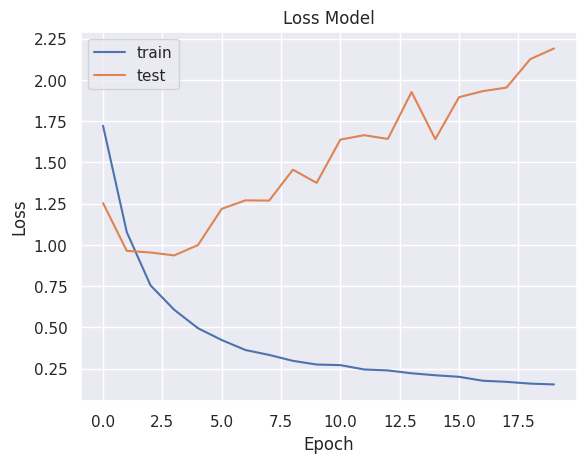

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

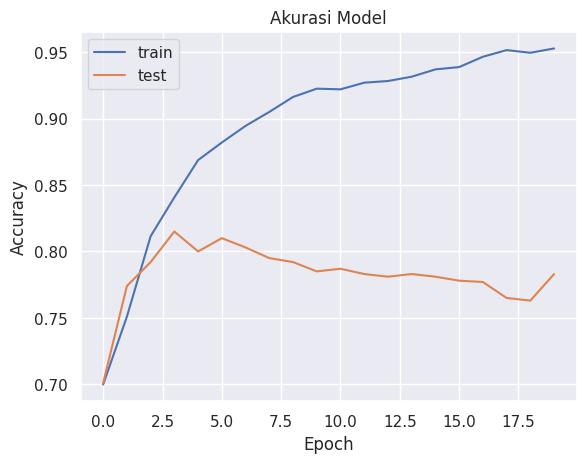

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()